# Analysis of the Max params

In [2]:
import sys
import os
module_path = os.path.abspath(os.path.join('..','..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from experiments.tools import GenerateParam, ArbitraryClientTool
from experiments.max_params_per_tool.max_params_per_tool import *

In [3]:
get_params = get_params(50)

Parameter 1: name temperature, type:float, description:The temperature of the environment.
Parameter 2: name humidity, type:int, description:The humidity level of the air.
Parameter 3: name pressure, type:bool, description:Whether the pressure is high or low.
Parameter 4: name altitude, type:str, description:The altitude of the location.
Parameter 5: name speed, type:float, description:The speed of the object.
Parameter 6: name location, type:str, description:The location of the object.
Parameter 7: name time, type:int, description:The time of day.
Parameter 8: name direction, type:str, description:The direction of travel.
Parameter 9: name distance, type:float, description:The distance traveled.
Parameter 10: name speed_limit, type:int, description:The speed limit of the road.
Parameter 11: name fuel_level, type:float, description:The fuel level of the vehicle.
Parameter 12: name fuel_efficiency, type:float, description:The fuel efficiency of the vehicle.
Parameter 13: name engine_siz

In [4]:
print(f"Starting test: {get_params['name']}")

Starting test: ['temperature', 'humidity', 'pressure', 'altitude', 'speed', 'location', 'time', 'direction', 'distance', 'speed_limit', 'fuel_level', 'fuel_efficiency', 'engine_size', 'horsepower', 'torque', 'transmission_type', 'gear_ratio', 'brake_type', 'suspension_type', 'steering_type', 'seat_type', 'airbag_type', 'anti_lock_brake_system', 'electronic_stability_control', 'lane_departure_warning', 'adaptive_cruise_control', 'blind_spot_monitor', 'rear_view_camera', 'parking_sensors', 'keyless_entry', 'push_start_button', 'remote_start', 'smartphone_app', 'voice_command', 'navigation_system', 'automatic_emergency_braking', 'lane_centering', 'traffic_sign_recognition', 'driver_monitoring', 'parking_sonar', '360_degree_camera', 'blind_spot_monitoring']


In [5]:


# To track seen names and their indices
seen_names = set()
indices_to_remove = []

# Iterate over the 'name' list
for i in range(len(get_params['name'])):
    if get_params['name'][i] in seen_names:
        # Mark the index for removal if name is duplicated
        print(f"Duplicate name found: {get_params['name'][i]}")
        indices_to_remove.append(i)
    else:
        # Otherwise, add to the set of seen names
        seen_names.add(get_params['name'][i])

# Remove the entries that have duplicates in 'name'
get_params['name'] = [get_params['name'][i] for i in range(len(get_params['name'])) if i not in indices_to_remove]
get_params['type'] = [get_params['type'][i] for i in range(len(get_params['type'])) if i not in indices_to_remove]
get_params['description'] = [get_params['description'][i] for i in range(len(get_params['description'])) if i not in indices_to_remove]

# Output the cleaned get_params
print("Data cleaned (duplicates removed): \n")
for param in get_params:
    print(param, get_params[param])


Data cleaned (duplicates removed): 

name ['temperature', 'humidity', 'pressure', 'altitude', 'speed', 'location', 'time', 'direction', 'distance', 'speed_limit', 'fuel_level', 'fuel_efficiency', 'engine_size', 'horsepower', 'torque', 'transmission_type', 'gear_ratio', 'brake_type', 'suspension_type', 'steering_type', 'seat_type', 'airbag_type', 'anti_lock_brake_system', 'electronic_stability_control', 'lane_departure_warning', 'adaptive_cruise_control', 'blind_spot_monitor', 'rear_view_camera', 'parking_sensors', 'keyless_entry', 'push_start_button', 'remote_start', 'smartphone_app', 'voice_command', 'navigation_system', 'automatic_emergency_braking', 'lane_centering', 'traffic_sign_recognition', 'driver_monitoring', 'parking_sonar', '360_degree_camera', 'blind_spot_monitoring']
type ['float', 'int', 'bool', 'str', 'float', 'str', 'int', 'str', 'float', 'int', 'float', 'float', 'int', 'int', 'float', 'str', 'float', 'str', 'str', 'str', 'str', 'str', 'str', 'str', 'str', 'str', 'str',

In [6]:
print(len(get_params['name']))

42


In [8]:
import random
retry = False
acc_dict  = {}
for i in range(1, 40):
    error_count = 0
    # Get random indices from the range of the sliced lists
    random_indices = random.sample(range(len(get_params['name'])), i)
    if retry:
        i = i - 1
    # Select the corresponding names, types, and descriptions using the random indices
    selected_params = {
        'name': [get_params['name'][idx] for idx in random_indices],
        'type': [get_params['type'][idx] for idx in random_indices],
        'description': [get_params['description'][idx] for idx in random_indices]
    }
    print(len(selected_params['name']))
    response = test_abitrary_client_tool(selected_params)
    steps = response.steps
    # for step in steps:
    #     print(step)
    try:
        params_used = steps[1].tool_calls[0].arguments

        for param_name, param_value in params_used.items():
            index = selected_params['name'].index(param_name)
            expected_type = selected_params['type'][index]
            
            # Check if the type matches the expected type
            if not isinstance(param_value, eval(expected_type)):
                print(f"Parameter '{param_name}' has an invalid type. Expected '{expected_type}', but got '{type(param_value).__name__}'.")
                error_count += 1
        acc_dict[i] = error_count
        retry = False    
    except:
        print("Error with the tool")
        retry = True
        continue
    print("Parameter checks completed.")

`agent_config` is deprecated. Use inlined parameters instead.
`client_tools` is deprecated. Use `tools` instead.


1


`agent_config` is deprecated. Use inlined parameters instead.
`client_tools` is deprecated. Use `tools` instead.


Parameter checks completed.
2


`agent_config` is deprecated. Use inlined parameters instead.
`client_tools` is deprecated. Use `tools` instead.


Parameter checks completed.
3


`agent_config` is deprecated. Use inlined parameters instead.
`client_tools` is deprecated. Use `tools` instead.


Parameter checks completed.
4


`agent_config` is deprecated. Use inlined parameters instead.
`client_tools` is deprecated. Use `tools` instead.


Parameter 'horsepower' has an invalid type. Expected 'int', but got 'str'.
Parameter checks completed.
5


`agent_config` is deprecated. Use inlined parameters instead.
`client_tools` is deprecated. Use `tools` instead.


Parameter checks completed.
6


`agent_config` is deprecated. Use inlined parameters instead.
`client_tools` is deprecated. Use `tools` instead.


Parameter 'gear_ratio' has an invalid type. Expected 'float', but got 'str'.
Parameter 'distance' has an invalid type. Expected 'float', but got 'str'.
Parameter checks completed.
7


`agent_config` is deprecated. Use inlined parameters instead.
`client_tools` is deprecated. Use `tools` instead.


Parameter 'speed_limit' has an invalid type. Expected 'int', but got 'float'.
Parameter checks completed.
8


`agent_config` is deprecated. Use inlined parameters instead.
`client_tools` is deprecated. Use `tools` instead.


Parameter 'engine_size' has an invalid type. Expected 'int', but got 'float'.
Parameter 'humidity' has an invalid type. Expected 'int', but got 'float'.
Parameter checks completed.
9


`agent_config` is deprecated. Use inlined parameters instead.
`client_tools` is deprecated. Use `tools` instead.


Parameter 'temperature' has an invalid type. Expected 'float', but got 'str'.
Parameter 'speed_limit' has an invalid type. Expected 'int', but got 'str'.
Parameter 'horsepower' has an invalid type. Expected 'int', but got 'str'.
Parameter checks completed.
10


`agent_config` is deprecated. Use inlined parameters instead.
`client_tools` is deprecated. Use `tools` instead.


Parameter 'time' has an invalid type. Expected 'int', but got 'float'.
Parameter checks completed.
11


`agent_config` is deprecated. Use inlined parameters instead.
`client_tools` is deprecated. Use `tools` instead.


Parameter 'time' has an invalid type. Expected 'int', but got 'float'.
Parameter checks completed.
12


`agent_config` is deprecated. Use inlined parameters instead.
`client_tools` is deprecated. Use `tools` instead.


Parameter 'time' has an invalid type. Expected 'int', but got 'float'.
Parameter 'humidity' has an invalid type. Expected 'int', but got 'float'.
Parameter checks completed.
13


`agent_config` is deprecated. Use inlined parameters instead.
`client_tools` is deprecated. Use `tools` instead.


Parameter 'engine_size' has an invalid type. Expected 'int', but got 'float'.
Parameter 'speed_limit' has an invalid type. Expected 'int', but got 'float'.
Parameter checks completed.
14


`agent_config` is deprecated. Use inlined parameters instead.
`client_tools` is deprecated. Use `tools` instead.


Parameter 'horsepower' has an invalid type. Expected 'int', but got 'float'.
Parameter 'time' has an invalid type. Expected 'int', but got 'float'.
Parameter checks completed.
15


`agent_config` is deprecated. Use inlined parameters instead.
`client_tools` is deprecated. Use `tools` instead.


Parameter 'humidity' has an invalid type. Expected 'int', but got 'float'.
Parameter 'speed_limit' has an invalid type. Expected 'int', but got 'float'.
Parameter checks completed.
16


`agent_config` is deprecated. Use inlined parameters instead.
`client_tools` is deprecated. Use `tools` instead.


Parameter 'humidity' has an invalid type. Expected 'int', but got 'float'.
Parameter 'engine_size' has an invalid type. Expected 'int', but got 'float'.
Parameter checks completed.
17


`agent_config` is deprecated. Use inlined parameters instead.
`client_tools` is deprecated. Use `tools` instead.


Parameter 'horsepower' has an invalid type. Expected 'int', but got 'float'.
Parameter 'humidity' has an invalid type. Expected 'int', but got 'float'.
Parameter checks completed.
18


`agent_config` is deprecated. Use inlined parameters instead.
`client_tools` is deprecated. Use `tools` instead.


Parameter 'time' has an invalid type. Expected 'int', but got 'float'.
Parameter checks completed.
19


`agent_config` is deprecated. Use inlined parameters instead.
`client_tools` is deprecated. Use `tools` instead.


Parameter 'humidity' has an invalid type. Expected 'int', but got 'float'.
Parameter 'time' has an invalid type. Expected 'int', but got 'float'.
Parameter checks completed.
20


`agent_config` is deprecated. Use inlined parameters instead.
`client_tools` is deprecated. Use `tools` instead.


Parameter 'humidity' has an invalid type. Expected 'int', but got 'float'.
Parameter 'speed_limit' has an invalid type. Expected 'int', but got 'float'.
Parameter checks completed.
21


`agent_config` is deprecated. Use inlined parameters instead.
`client_tools` is deprecated. Use `tools` instead.


Parameter 'speed_limit' has an invalid type. Expected 'int', but got 'float'.
Parameter 'horsepower' has an invalid type. Expected 'int', but got 'float'.
Parameter 'humidity' has an invalid type. Expected 'int', but got 'float'.
Parameter 'engine_size' has an invalid type. Expected 'int', but got 'float'.
Parameter checks completed.
22


`agent_config` is deprecated. Use inlined parameters instead.
`client_tools` is deprecated. Use `tools` instead.


Parameter 'fuel_level' has an invalid type. Expected 'float', but got 'str'.
Parameter 'speed_limit' has an invalid type. Expected 'int', but got 'str'.
Parameter 'gear_ratio' has an invalid type. Expected 'float', but got 'str'.
Parameter 'temperature' has an invalid type. Expected 'float', but got 'str'.
Parameter 'torque' has an invalid type. Expected 'float', but got 'str'.
Parameter 'distance' has an invalid type. Expected 'float', but got 'str'.
Parameter 'horsepower' has an invalid type. Expected 'int', but got 'str'.
Parameter 'pressure' has an invalid type. Expected 'bool', but got 'str'.
Parameter checks completed.
23


`agent_config` is deprecated. Use inlined parameters instead.
`client_tools` is deprecated. Use `tools` instead.


Parameter 'horsepower' has an invalid type. Expected 'int', but got 'float'.
Parameter 'engine_size' has an invalid type. Expected 'int', but got 'float'.
Parameter 'time' has an invalid type. Expected 'int', but got 'float'.
Parameter 'humidity' has an invalid type. Expected 'int', but got 'float'.
Parameter checks completed.
24


`agent_config` is deprecated. Use inlined parameters instead.
`client_tools` is deprecated. Use `tools` instead.


Parameter 'horsepower' has an invalid type. Expected 'int', but got 'float'.
Parameter 'engine_size' has an invalid type. Expected 'int', but got 'float'.
Parameter checks completed.
25


`agent_config` is deprecated. Use inlined parameters instead.
`client_tools` is deprecated. Use `tools` instead.


Parameter 'humidity' has an invalid type. Expected 'int', but got 'float'.
Parameter 'horsepower' has an invalid type. Expected 'int', but got 'float'.
Parameter checks completed.
26


`agent_config` is deprecated. Use inlined parameters instead.
`client_tools` is deprecated. Use `tools` instead.


Parameter 'speed_limit' has an invalid type. Expected 'int', but got 'float'.
Parameter 'time' has an invalid type. Expected 'int', but got 'float'.
Parameter 'humidity' has an invalid type. Expected 'int', but got 'float'.
Parameter checks completed.
27


`agent_config` is deprecated. Use inlined parameters instead.
`client_tools` is deprecated. Use `tools` instead.


Parameter 'time' has an invalid type. Expected 'int', but got 'str'.
Parameter 'fuel_level' has an invalid type. Expected 'float', but got 'str'.
Parameter 'torque' has an invalid type. Expected 'float', but got 'str'.
Parameter 'temperature' has an invalid type. Expected 'float', but got 'str'.
Parameter 'horsepower' has an invalid type. Expected 'int', but got 'str'.
Parameter 'speed_limit' has an invalid type. Expected 'int', but got 'str'.
Parameter checks completed.
28


`agent_config` is deprecated. Use inlined parameters instead.
`client_tools` is deprecated. Use `tools` instead.


Parameter 'engine_size' has an invalid type. Expected 'int', but got 'float'.
Parameter 'horsepower' has an invalid type. Expected 'int', but got 'float'.
Parameter checks completed.
29


`agent_config` is deprecated. Use inlined parameters instead.
`client_tools` is deprecated. Use `tools` instead.


Parameter 'time' has an invalid type. Expected 'int', but got 'float'.
Parameter 'engine_size' has an invalid type. Expected 'int', but got 'float'.
Parameter checks completed.
30


`agent_config` is deprecated. Use inlined parameters instead.
`client_tools` is deprecated. Use `tools` instead.


Parameter 'engine_size' has an invalid type. Expected 'int', but got 'float'.
Parameter 'humidity' has an invalid type. Expected 'int', but got 'float'.
Parameter 'time' has an invalid type. Expected 'int', but got 'float'.
Parameter 'speed_limit' has an invalid type. Expected 'int', but got 'float'.
Parameter 'horsepower' has an invalid type. Expected 'int', but got 'float'.
Parameter checks completed.
31


`agent_config` is deprecated. Use inlined parameters instead.
`client_tools` is deprecated. Use `tools` instead.


Parameter 'speed_limit' has an invalid type. Expected 'int', but got 'float'.
Parameter 'time' has an invalid type. Expected 'int', but got 'float'.
Parameter checks completed.
32


`agent_config` is deprecated. Use inlined parameters instead.
`client_tools` is deprecated. Use `tools` instead.


Parameter 'horsepower' has an invalid type. Expected 'int', but got 'float'.
Parameter 'time' has an invalid type. Expected 'int', but got 'float'.
Parameter 'engine_size' has an invalid type. Expected 'int', but got 'float'.
Parameter 'speed_limit' has an invalid type. Expected 'int', but got 'float'.
Parameter checks completed.
33


`agent_config` is deprecated. Use inlined parameters instead.
`client_tools` is deprecated. Use `tools` instead.


Parameter 'engine_size' has an invalid type. Expected 'int', but got 'float'.
Parameter 'time' has an invalid type. Expected 'int', but got 'float'.
Parameter 'horsepower' has an invalid type. Expected 'int', but got 'float'.
Parameter 'speed_limit' has an invalid type. Expected 'int', but got 'float'.
Parameter checks completed.
34


`agent_config` is deprecated. Use inlined parameters instead.
`client_tools` is deprecated. Use `tools` instead.


Parameter 'speed_limit' has an invalid type. Expected 'int', but got 'float'.
Parameter 'engine_size' has an invalid type. Expected 'int', but got 'float'.
Parameter 'humidity' has an invalid type. Expected 'int', but got 'float'.
Parameter 'horsepower' has an invalid type. Expected 'int', but got 'float'.
Parameter 'time' has an invalid type. Expected 'int', but got 'float'.
Parameter checks completed.
35


`agent_config` is deprecated. Use inlined parameters instead.
`client_tools` is deprecated. Use `tools` instead.


Parameter 'time' has an invalid type. Expected 'int', but got 'float'.
Parameter 'engine_size' has an invalid type. Expected 'int', but got 'float'.
Parameter 'humidity' has an invalid type. Expected 'int', but got 'float'.
Parameter 'speed_limit' has an invalid type. Expected 'int', but got 'float'.
Parameter checks completed.
36


`agent_config` is deprecated. Use inlined parameters instead.
`client_tools` is deprecated. Use `tools` instead.


Parameter 'horsepower' has an invalid type. Expected 'int', but got 'float'.
Parameter 'speed_limit' has an invalid type. Expected 'int', but got 'float'.
Parameter 'engine_size' has an invalid type. Expected 'int', but got 'float'.
Parameter 'humidity' has an invalid type. Expected 'int', but got 'float'.
Parameter checks completed.
37


`agent_config` is deprecated. Use inlined parameters instead.
`client_tools` is deprecated. Use `tools` instead.


Parameter 'horsepower' has an invalid type. Expected 'int', but got 'float'.
Parameter 'humidity' has an invalid type. Expected 'int', but got 'float'.
Parameter 'engine_size' has an invalid type. Expected 'int', but got 'float'.
Parameter 'time' has an invalid type. Expected 'int', but got 'float'.
Parameter 'speed_limit' has an invalid type. Expected 'int', but got 'float'.
Parameter checks completed.
38


`agent_config` is deprecated. Use inlined parameters instead.
`client_tools` is deprecated. Use `tools` instead.


Parameter 'speed_limit' has an invalid type. Expected 'int', but got 'float'.
Parameter 'horsepower' has an invalid type. Expected 'int', but got 'float'.
Parameter 'engine_size' has an invalid type. Expected 'int', but got 'float'.
Parameter 'humidity' has an invalid type. Expected 'int', but got 'float'.
Parameter 'time' has an invalid type. Expected 'int', but got 'float'.
Parameter checks completed.
39
Parameter 'horsepower' has an invalid type. Expected 'int', but got 'float'.
Parameter 'speed_limit' has an invalid type. Expected 'int', but got 'float'.
Parameter 'engine_size' has an invalid type. Expected 'int', but got 'float'.
Parameter 'humidity' has an invalid type. Expected 'int', but got 'float'.
Parameter 'time' has an invalid type. Expected 'int', but got 'float'.
Parameter checks completed.


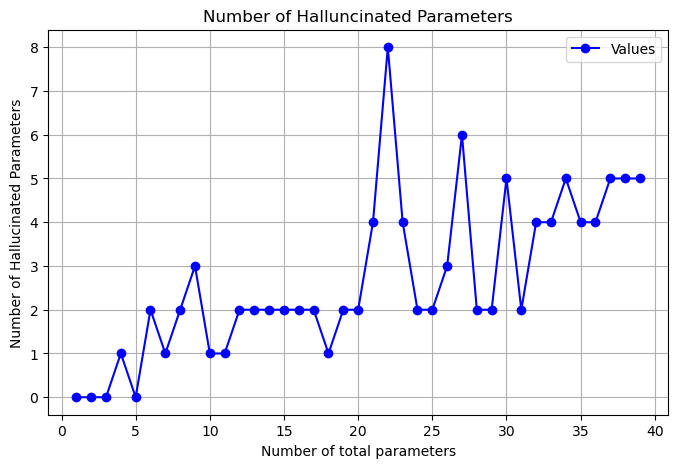

In [9]:
import matplotlib.pyplot as plt

# Example dictionary with numerical keys and values

# Extract keys and values
keys = list(acc_dict.keys())
values = list(acc_dict.values())

# Create a plot
plt.figure(figsize=(8, 5))

# Plot the values
plt.plot(keys, values, marker='o', linestyle='-', color='b', label='Values')

# Label the axes
plt.xlabel('Number of total parameters')
plt.ylabel('Number of Hallucinated Parameters')

# Add a title to the plot
plt.title('Number of Halluncinated Parameters')

# Optionally, add gridlines for better visibility
plt.grid(True)

# Show the plot
plt.legend()
plt.show()


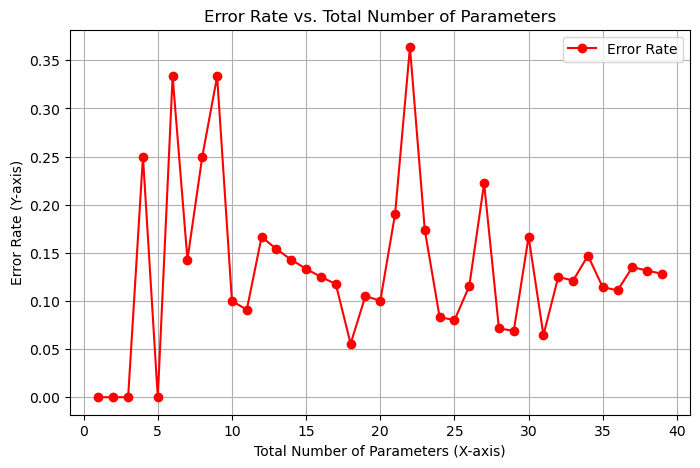

In [10]:

import numpy as np

# Compute error rate (errors/params)
error_rate = {key: value / key for key, value in acc_dict.items()}

# Extract keys (total params) and values (error rates)
keys = list(error_rate.keys())
values = list(error_rate.values())

# Create a plot
plt.figure(figsize=(8, 5))

# Plot the error rates
plt.plot(keys, values, marker='o', linestyle='-', color='r', label='Error Rate')

# Label the axes
plt.xlabel('Total Number of Parameters (X-axis)')
plt.ylabel('Error Rate (Y-axis)')

# Add a title to the plot
plt.title('Error Rate vs. Total Number of Parameters')

# Optionally, add gridlines for better visibility
plt.grid(True)

# Show the plot
plt.legend()
plt.show()


In [ ]:
import os
import csv

## Combine error_rate and acc_dict into a list of rows
combined_data = []
for key in error_rate:
    if key in acc_dict:  # Check if key is in both dictionaries
        combined_data.append([key, error_rate[key], acc_dict[key]])

# Define the file path
file_path = 'experiment_logs/max_params_single_call/ollama_3_2_3B_temp.csv'

# Ensure the directory exists, create if it doesn't
os.makedirs(os.path.dirname(file_path), exist_ok=True)

# Write to CSV file with explicit delimiter (comma)
with open(file_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file, delimiter=',')  # Ensure comma is the delimiter
    # Write the header for table
    writer.writerow(["number_params", "error_rate", "incorrect_inputs"])
    # Write the data rows (this will form the table)
    writer.writerows(combined_data)

print(f"Data has been written to {file_path}")


Data has been written to experiment_logs/max_params_single_call/ollama_3_2_3B_temp_0_dot_5_.csv
